In [1]:
from google.colab import files
uploaded = files.upload()


Saving NIFTY 50-04-06-2024-to-04-06-2025.csv to NIFTY 50-04-06-2024-to-04-06-2025.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from google.colab import files

In [3]:
df = pd.read_csv('NIFTY 50-04-06-2024-to-04-06-2025.csv')

In [6]:
df.columns = df.columns.str.strip()

In [7]:
df = df[['Date', 'Close']].copy()

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%b-%Y")
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

def prepare_data(df, forecast_col, forecast_out, test_size):
    df['Label'] = df[forecast_col].shift(-forecast_out)
    X = np.array(df[[forecast_col]])
    X = preprocessing.scale(X)
    X_lately = X[-forecast_out:]
    X = X[:-forecast_out]
    df.dropna(inplace=True)
    y = np.array(df['Label'])
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    return X_train, X_test, Y_train, Y_test, X_lately


In [10]:
from sklearn.linear_model import LinearRegression


forecast_col = 'Close'
forecast_out = 5
test_size = 0.2


X_train, X_test, Y_train, Y_test, X_lately = prepare_data(df.copy(), forecast_col, forecast_out, test_size)


model = LinearRegression()
model.fit(X_train, Y_train)


score = model.score(X_test, Y_test)
forecast = model.predict(X_lately)


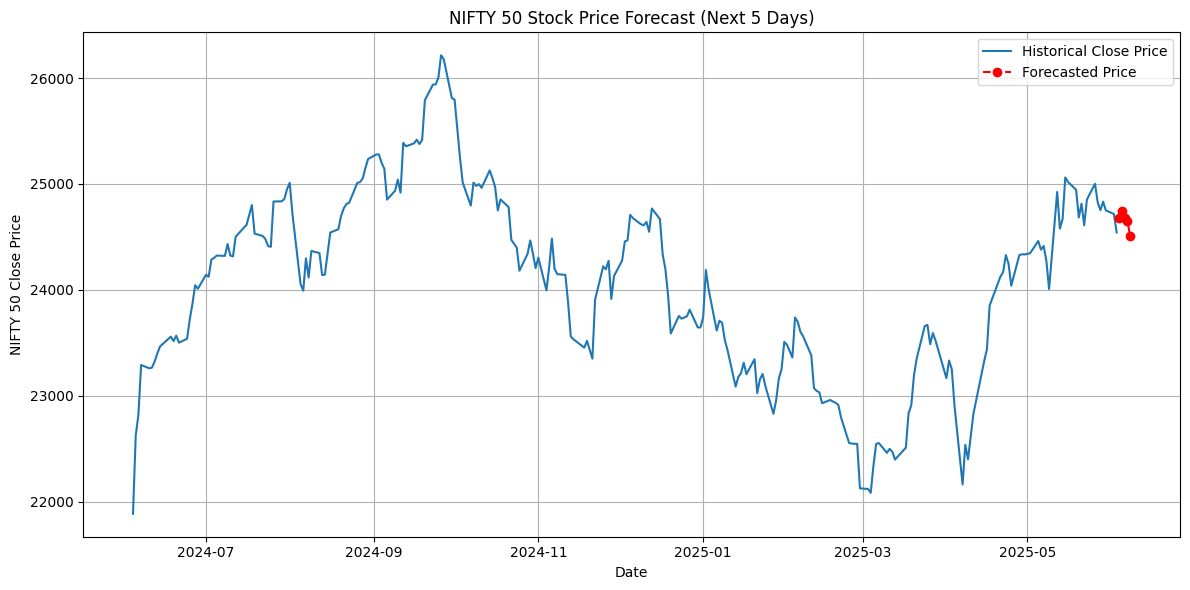

In [11]:
import matplotlib.pyplot as plt
import pandas as pd


forecast_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=forecast_out)
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})


plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Historical Close Price')
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='Forecasted Price', marker='o', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('NIFTY 50 Close Price')
plt.title('NIFTY 50 Stock Price Forecast (Next 5 Days)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
response = {
    'test_score': score,
    'forecast_set': forecast.tolist()
}
print("Model Accuracy (R² Score):", response['test_score'])
print("Forecasted Prices:", response['forecast_set'])


Model Accuracy (R² Score): 0.6968381040302637
Forecasted Prices: [24676.061625924434, 24741.038051323838, 24674.660409110526, 24647.356698622294, 24507.955643021116]
